<a href="https://colab.research.google.com/github/compartia/nlp_tools/blob/tensorflow-model/NER_Matcher_(TF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
GLOBALS__={}

## MAIN, init, load code

In [2]:
#@title  { form-width: "300px", display-mode: "form" }
import os






# ''' AZ:-IMPORT CODE GITHUB----------------------------------------------😺------ '''
import sys
# ====================================
# ====================================
_git_branch = "tensorflow-model"  # @param {type:"string"}
# ====================================
# ====================================


def _init_import_code_from_gh():
  if 'GLOBALS__' not in globals():
    print('adding global GLOBALS__')
    global GLOBALS__
    GLOBALS__ = {}

  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  import subprocess
  def exec(x):
    r = subprocess.check_output(x, shell=True)
    r = r.decode('unicode-escape').encode('latin1').decode('utf8')
    print(r)

  print(f"fetching code from GitHub.....{_git_branch}")
  try:
    exec('rm -r nlp_tools')
  except:
    pass
  exec(f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools')

  print('🦊 GIT revision:')
  exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

  sys.path.insert(0, 'nlp_tools')

  # self-test
  from text_tools import untokenize
  print(untokenize(['code', 'imported', 'OK 👍']))

  print('installing antiword...')
  exec('sudo apt-get install antiword')

  print('installing docx2txt...')
  exec("pip install docx2txt")

  GLOBALS__['_init_import_code_from_gh'] = True

  ''' AZ:-------------------------------------------------IMPORT CODE GITHUB-😺---'''
  print('❤️ DONE importing Code fro GitHub')


# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow_hub as hub

#
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML


 

# AZ:- THE CODE----------------------------------------------------------------------------------

def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  from renderer import HtmlRenderer
  from renderer import to_multicolor_text
  from renderer import known_subjects_dict

  from structures import ContractSubject
  from contract_parser import ContractDocument3

  from ml_tools import ProbableValue

  from legal_docs import LegalDocument
  from renderer import as_warning, as_headline_3, as_offset, as_smaller

  class DemoRenderer(HtmlRenderer):

    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      return super()._to_color_text(tokens, weights, mpl, colormap=colormap, _range=_range)

    def render_multicolor_text(self, tokens, vectors, colormap, min_color=None, _slice=None):
      display(HTML(to_multicolor_text(tokens, vectors, colormap, min_color=min_color, _slice=_slice)))

     
     

     
  GLOBALS__['renderer'] = DemoRenderer()

  GLOBALS__['_init_the_code'] = True
  print("❤️ DONE initializing the code")

  # AZ:-------------------------------------------------Init Protocols context===


def read_doc(fn):
  import docx2txt, sys, os

  text = ''
  try:
    text = docx2txt.process(fn)

  except:
    print("Unexpected error:", sys.exc_info())
    os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
    with open(fn + '.txt') as f:
      text = f.read()

  return text

def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs

  
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX


# 1.
_init_import_code_from_gh()
 
# 3.
_init_the_code(True)



W0514 13:17:29.676678 140356914116480 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


fetching code from GitHub.....tensorflow-model


🦊 GIT revision:
425
* tensorflow-model
Tiny fixes

Created using Colaboratory
Refactoring rex


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
code imported OK 👍
installing antiword...
Reading package lists...
Building dependency tree...
Reading state information...
antiword is already the newest version (0.37-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.

installing docx2txt...

❤️ DONE importing Code fro GitHub
❤️ DONE initializing the code


### load files from gdrive

In [3]:

from google.colab import auth
from google.colab import drive
 

drive.mount('/content/gdrive', force_remount=True)


import glob
def read_documents(filename_prefix):
  texts = {}
  for file in glob.glob(filename_prefix+"*.doc"):
    try:
      text = read_doc(file)
      texts[file] = text
      print("good:", file)
    except:
      print('WRONG *.doc FILE!!', file)

  for file in glob.glob(filename_prefix+"*.docx"):
    try:
      text = read_doc(file)
      texts[file] = text
      print("good:", file)
    except:
      print('WRONG *.docx FILE!!', file)
      
  return texts

contracts_filename_prefix='/content/gdrive/My Drive/GazpromOil/Contracts/'
contracts = read_documents(contracts_filename_prefix)

Mounted at /content/gdrive
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7fa6f36eda08>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора ООО Чудеса.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7fa6f36ed788>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Доп.согл3 Доверие.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7fa6f36eda88>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора ООО Зеленые.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7fa6f36eda48>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Договор купли-продажи_ООО Парацельс.doc
Unexpected error: (<class 'KeyError'>, KeyEr

#Разметка договоров ( regEx)
 - чтение докуметов
 - поиск по шаблонам (org name, org type, org alias, etc)
 - формирование one-hot векторов (матрицы), она будет использована в TF модели как labels

### Rendering utils

In [0]:
def color_matrix(matrix, tokens):
    
  mt = matrix.T

  colormap = {
      
    '0': (1, 0, 0),
    '1': (0, 0.3, 1),
        
    '0.type': (0, 1, 0.6),
    '1.type': (0, 1, 0.5),
      
    '0.name': (1, 0.7, 0),
    '1.name': (1, 0.5, 0),

    '0.alias': (0.3, 1, 0),
    '1.alias': (0.2, 1, 0),

    '0.alt_name': (0.6, 0.2, 0),
    '1.alt_name': (0.6, 0.2, 0),
  }
  
  
  vectors = {}
  for k in range( int(matrix.shape[1] )):
    key = f'{int(k/len(entities_types))}.{entities_types[k%len(entities_types)]}'
    vectors[key] = mt[k]
  
 

  GLOBALS__['renderer'].render_multicolor_text(tokens, vectors, colormap, min_color=(0.4, 0.4, 0.4) )
  
  
##------------
def plot_matrix(matrix):
    
  mt = matrix.T
  
  with sns.axes_style("white"):
    plt.figure(figsize=(25, 3))
    ax = sns.heatmap(mt, square=False,  cmap="YlGnBu")
    plt.show()


## Разметка

#### Идея!
Склеить матрицу категорий `M` (в которой большенство -- нули (sparce) ) с инвертированной матрицей  `1-M`

Таким образом, ни один класс не будет доминировать


{'type': ('Акционерное общество', (187, 207)), 'type_ext': (' ', (207, 208)), 'name': ('Доверие', (209, 216)), 'alt_name': ('', (217, 217)), 'alias': ('Гарант', (243, 249))}
{'type': ('Общество с ограниченной ответственностью', (438, 478)), 'type_ext': (' ', (478, 479)), 'name': ('Газпромнефть-Корпоративные продажи', (480, 514)), 'alt_name': ('', (515, 515)), 'alias': ('Принципал', (541, 550))}
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


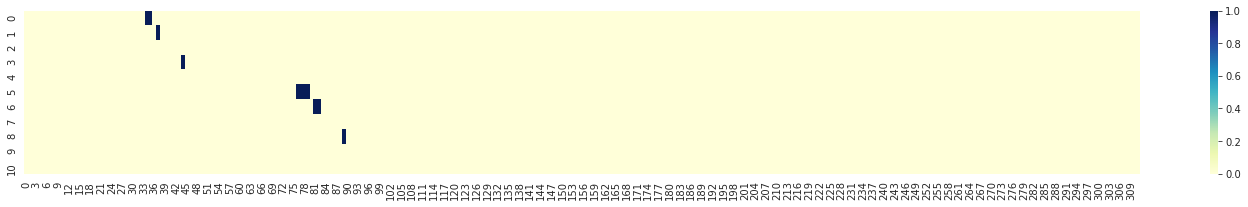

In [5]:
import numpy as np

from contract_agents import find_org_names, normalize_contract
from text_tools import tokenize_text, tokens_in_range

# TODO: import this
entities_types = ['type', 'name', 'alt_name', 'alias', 'type_ext']


def preprocess_contract(txt):
  trimmed = txt[0:2000]
  normalized_contract = normalize_contract(trimmed)
  return normalized_contract


def validate_find_patterns_in_contract_results(d):
  assert len(d) == 2


#   TODO:

def find_patterns_in_contract(normalized_contract: str):
  tokens = tokenize_text(normalized_contract)

  agents_infos = find_org_names(normalized_contract)
  validate_find_patterns_in_contract_results(agents_infos)

  cols = len(tokens)
  rows_per_org = len(entities_types)

  rows = 1 + 2 * rows_per_org  # 3XXX: why +1 ???

  matrix = np.zeros((rows, cols))

  for agent_n in range(len(agents_infos)):
    org = agents_infos[agent_n]

    for i in range(rows_per_org):
      entity_type = entities_types[i]
      row =  agent_n * rows_per_org + i

      span = org[entity_type][1]

      if span[0] > 0:
        text_slice = tokens_in_range(span, tokens, normalized_contract)
        matrix[row][text_slice] = 1.0

      row += 1
  
  
# Идея!
#   matrix_double = np.zeros((rows*2, cols))
#   matrix_double[0:rows,0:cols] = matrix
#   matrix_double[rows:2*rows,0:cols] = 1-matrix
  
  print(agents_infos[0])
  print(agents_infos[1])
  
#   return matrix_double.T
  return matrix.T

  
  
  
### TESTS 🔞============✂️============⚙️========================================

import matplotlib.pyplot as plt
import seaborn as sns


  
  
  
  
t = preprocess_contract( list(contracts.values())[1] )
tokens = tokenize_text(t)
matrix = find_patterns_in_contract(t)


print(matrix[0])

color_matrix(matrix, tokens)
plot_matrix(matrix)

# Keras model

In [6]:
import os
import numpy as np

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

from keras.activations import relu
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Embedding, Flatten, Conv1D, MaxPooling1D, Lambda, Add, BatchNormalization
from keras.layers import Dropout, concatenate
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import classification_report

from IPython.display import SVG

Using TensorFlow backend.


## Make dataset

In [0]:
from text_tools import untokenize

_TEXTS=[]
_TEXTS_tmp=[]
_LENS_tmp=[]

_LABELS=[]
_LENS=[]
data = list(contracts.keys())

 
for fn in data:  
  con = contracts[fn]
  t = preprocess_contract( con )
  tokens = tokenize_text(t)  
  _TEXTS_tmp.append(tokens)
  _LENS_tmp.append(len(tokens))

#PADDING
 
_longest_len = _LENS_tmp[np.argmax(_LENS_tmp)  ] 
print('_longest_len',_longest_len)
for i in range(len(_TEXTS_tmp)):
  _TEXTS_tmp[i] = _TEXTS_tmp[i] + ['PAD']* (_longest_len - len(_TEXTS_tmp[i]))
  
 
   
for i in range( len(data)):  #:[39:45]:
  try:
    print(i, data[i])
    
#     con = contracts[fn]

    tokens = _TEXTS_tmp[i]
    t = untokenize(tokens)
#     print(t)

    _matrix = find_patterns_in_contract(t)
    matrix = np.zeros( (_longest_len, _matrix.shape[1]) )
    matrix[:_matrix.shape[0],:_matrix.shape[1]] = _matrix
    print(matrix.shape)
    assert len(matrix) == _longest_len

    _TEXTS.append(tokens)
    _LENS.append(len(tokens))
    _LABELS.append(matrix)



    print(matrix.shape)

  except:
    print('ERROR:')
   

print(len(_TEXTS))

### Plot sample label  matrices

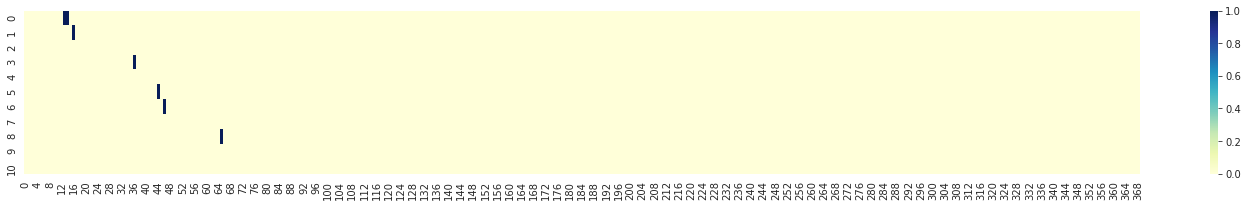

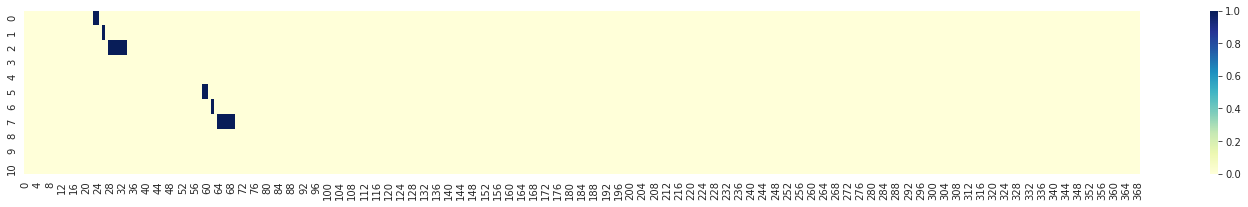

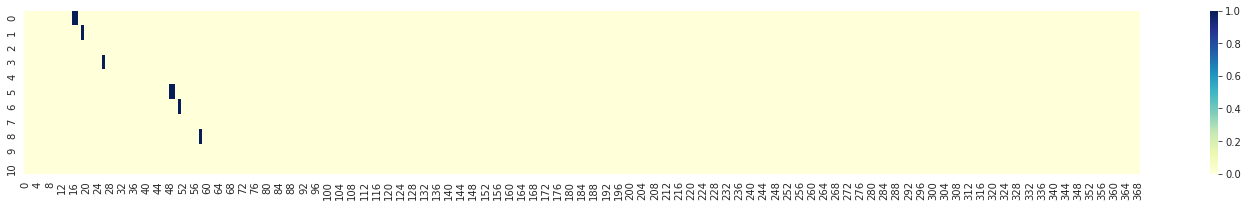

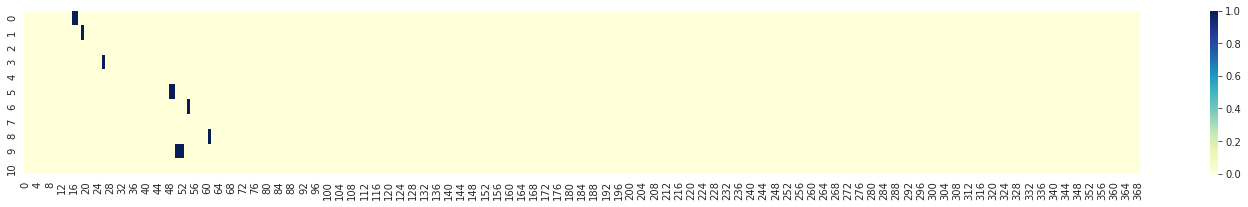

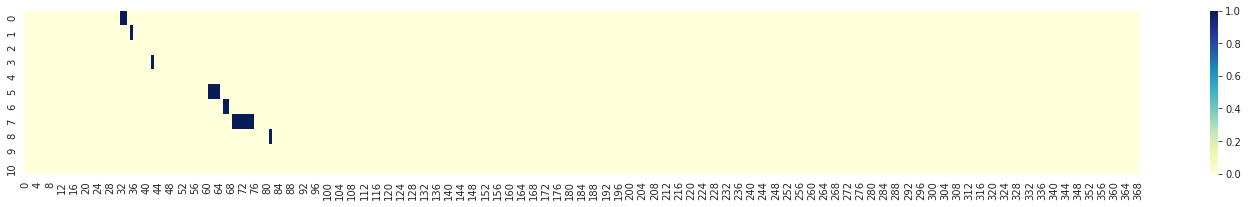

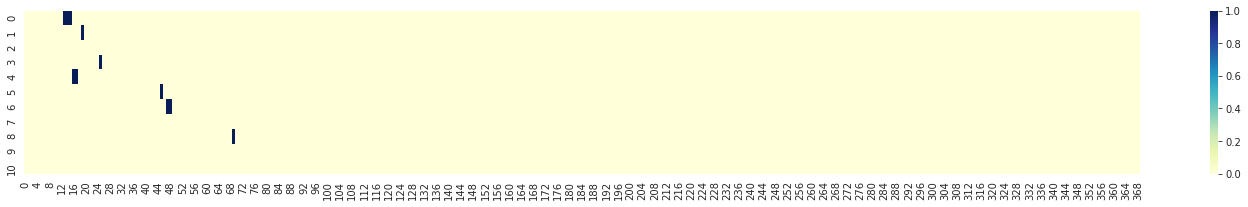

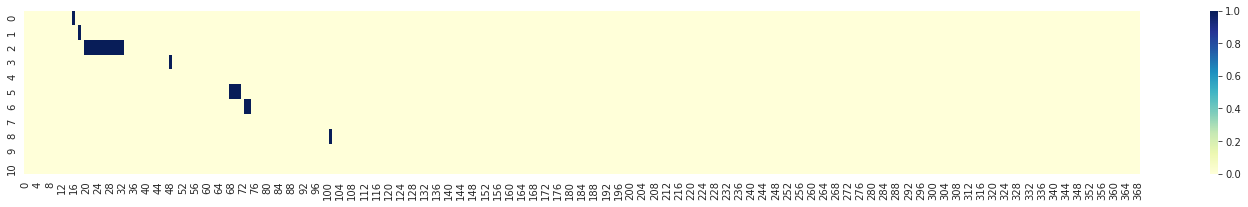

In [8]:
for m in _LABELS[3:10]:
  plot_matrix(m) 

# MODEL

## ELMo module support  

In [0]:

import tensorflow as tf

module_url = 'https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz'


In [0]:

def get_embedings(inputs):
  r = elmo(
    inputs={
      "tokens": inputs[0],
      "sequence_len": tf.squeeze(inputs[1])
    },
    signature="tokens",
    as_dict=True)["elmo"]

  return r


# ------
def elmo_output_shape(input_shapes):
  shape1 = list(input_shapes)
  shape1[-1] = 1024
  return tuple(shape1)




## The Model

In [0]:
from keras import backend as K
from keras.objectives import categorical_crossentropy



def custom_loss(y_true, y_pred):
  return K.mean( K.square(y_pred - y_true) )
  
  
  
def get_conv_pool(x_input, sufix, feature_maps, n=3, activation='relu'):
  branch = Conv1D( filters = feature_maps, kernel_size=(n), padding='same', activation=activation, name='Conv_'+sufix+'_'+str(n))(x_input)
  return branch



def custom_categorical_crossentropy(x, y):
    x = K.flatten(x)
    y = K.flatten(y)
    return categorical_crossentropy(x, y)

  
  
  
def build_model(features): 
  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  embedding = Lambda(get_embedings, (1024, ), name="deeppavlov".upper())( [text_input, text_lengths]  )

  conv_1 = get_conv_pool(embedding, 'c1', n=3, feature_maps=features*2, activation='sigmoid' )  
  conv_2 = get_conv_pool(embedding, 'c2', n=5, feature_maps=features*2, activation='sigmoid')
  
  conv_sum = Add()([conv_1, conv_2]) 
  
  conv_3 = get_conv_pool(conv_sum, 'c3', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=conv_3)

  model.compile(loss=custom_categorical_crossentropy, optimizer='adam')
  model.summary()
  
  return model






__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, 1024)         0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c1_3 (Conv1D)              (None, 22)           67606       DEEPPAVLOV[0][0]                 
__________

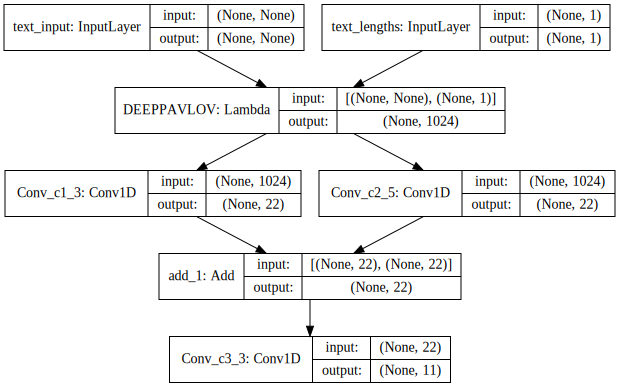

In [31]:
np_LABELS = np.array(_LABELS)

graph = tf.Graph()

with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_model( np_LABELS.shape[-1] )
  
  
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

## Fit

Epoch 1/20
31/31 [==============================] - 3s 97ms/step - loss: 4721.5186
Epoch 2/20
31/31 [==============================] - 2s 51ms/step - loss: 4598.3477
Epoch 3/20
31/31 [==============================] - 2s 52ms/step - loss: 4546.5312
Epoch 4/20
31/31 [==============================] - 2s 52ms/step - loss: 4516.0000
Epoch 5/20
31/31 [==============================] - 2s 52ms/step - loss: 4488.7720
Epoch 6/20
31/31 [==============================] - 2s 53ms/step - loss: 4461.3193
Epoch 7/20
31/31 [==============================] - 2s 52ms/step - loss: 4433.4424
Epoch 8/20
31/31 [==============================] - 2s 53ms/step - loss: 4406.3184
Epoch 9/20
31/31 [==============================] - 2s 53ms/step - loss: 4380.5947
Epoch 10/20
31/31 [==============================] - 2s 52ms/step - loss: 4356.8960
Epoch 11/20
31/31 [==============================] - 2s 53ms/step - loss: 4335.2822
Epoch 12/20
31/31 [==============================] - 2s 55ms/step - loss: 4315.7539
E

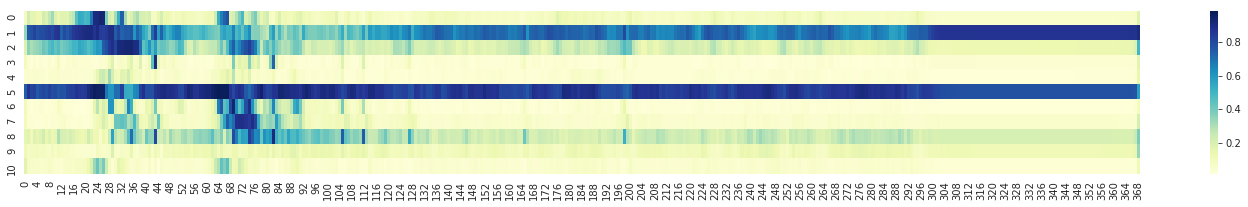

Epoch 1/20
31/31 [==============================] - 2s 55ms/step - loss: 4174.3457
Epoch 2/20
31/31 [==============================] - 2s 53ms/step - loss: 4158.8760
Epoch 3/20
31/31 [==============================] - 2s 53ms/step - loss: 4142.9053
Epoch 4/20
31/31 [==============================] - 2s 54ms/step - loss: 4126.2627
Epoch 5/20
31/31 [==============================] - 2s 54ms/step - loss: 4108.7124
Epoch 6/20
31/31 [==============================] - 2s 54ms/step - loss: 4090.5649
Epoch 7/20
31/31 [==============================] - 2s 53ms/step - loss: 4072.1458
Epoch 8/20
31/31 [==============================] - 2s 53ms/step - loss: 4053.6895
Epoch 9/20
31/31 [==============================] - 2s 52ms/step - loss: 4034.9761
Epoch 10/20
31/31 [==============================] - 2s 53ms/step - loss: 4015.9976
Epoch 11/20
31/31 [==============================] - 2s 53ms/step - loss: 3996.5503
Epoch 12/20
31/31 [==============================] - 2s 52ms/step - loss: 3976.7056
E

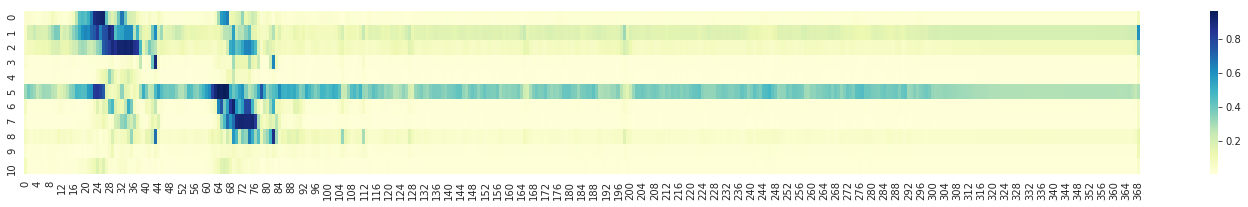

Epoch 1/20
31/31 [==============================] - 2s 52ms/step - loss: 3765.6904
Epoch 2/20
31/31 [==============================] - 2s 52ms/step - loss: 3738.5859
Epoch 3/20
31/31 [==============================] - 2s 52ms/step - loss: 3711.4399
Epoch 4/20
31/31 [==============================] - 2s 52ms/step - loss: 3683.3535
Epoch 5/20
31/31 [==============================] - 2s 52ms/step - loss: 3655.0579
Epoch 6/20
31/31 [==============================] - 2s 52ms/step - loss: 3626.0166
Epoch 7/20
31/31 [==============================] - 2s 52ms/step - loss: 3596.3921
Epoch 8/20
31/31 [==============================] - 2s 53ms/step - loss: 3566.5771
Epoch 9/20
31/31 [==============================] - 2s 51ms/step - loss: 3536.4751
Epoch 10/20
31/31 [==============================] - 2s 52ms/step - loss: 3506.7739
Epoch 11/20
31/31 [==============================] - 2s 52ms/step - loss: 3476.6885
Epoch 12/20
31/31 [==============================] - 2s 52ms/step - loss: 3447.1365
E

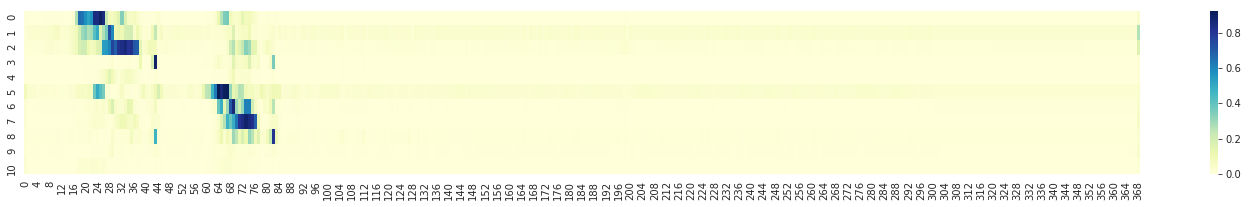

Epoch 1/20
31/31 [==============================] - 2s 52ms/step - loss: 3190.2129
Epoch 2/20
31/31 [==============================] - 2s 52ms/step - loss: 3163.3647
Epoch 3/20
31/31 [==============================] - 2s 52ms/step - loss: 3136.7339
Epoch 4/20
31/31 [==============================] - 2s 52ms/step - loss: 3110.7119
Epoch 5/20
31/31 [==============================] - 2s 53ms/step - loss: 3084.9678
Epoch 6/20
31/31 [==============================] - 2s 52ms/step - loss: 3059.0562
Epoch 7/20
31/31 [==============================] - 2s 52ms/step - loss: 3033.7935
Epoch 8/20
31/31 [==============================] - 2s 52ms/step - loss: 3008.8472
Epoch 9/20
31/31 [==============================] - 2s 52ms/step - loss: 2984.8645
Epoch 10/20
31/31 [==============================] - 2s 53ms/step - loss: 2961.5557
Epoch 11/20
31/31 [==============================] - 2s 52ms/step - loss: 2938.9155
Epoch 12/20
31/31 [==============================] - 2s 53ms/step - loss: 2917.3979
E

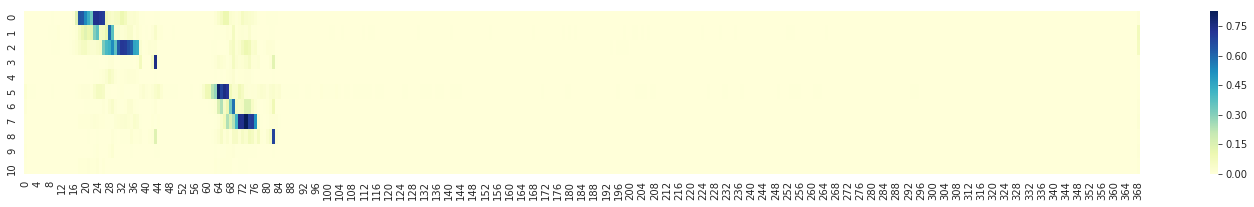

Epoch 1/20
31/31 [==============================] - 2s 55ms/step - loss: 2762.6221
Epoch 2/20
31/31 [==============================] - 2s 55ms/step - loss: 2749.5042
Epoch 3/20
31/31 [==============================] - 2s 55ms/step - loss: 2736.5569
Epoch 4/20
31/31 [==============================] - 2s 54ms/step - loss: 2724.5386
Epoch 5/20
31/31 [==============================] - 2s 55ms/step - loss: 2713.3716
Epoch 6/20
31/31 [==============================] - 2s 54ms/step - loss: 2702.3154
Epoch 7/20
31/31 [==============================] - 2s 52ms/step - loss: 2692.1587
Epoch 8/20
31/31 [==============================] - 2s 53ms/step - loss: 2682.5215
Epoch 9/20
31/31 [==============================] - 2s 53ms/step - loss: 2673.1792
Epoch 10/20
31/31 [==============================] - 2s 53ms/step - loss: 2664.2246
Epoch 11/20
31/31 [==============================] - 2s 53ms/step - loss: 2655.9292
Epoch 12/20
31/31 [==============================] - 2s 52ms/step - loss: 2647.7153
E

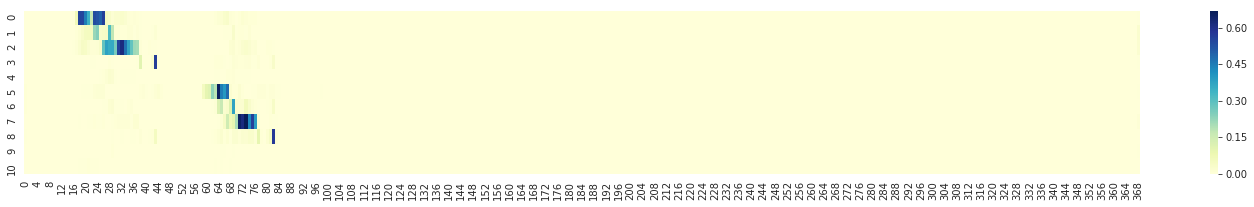

Epoch 1/20
31/31 [==============================] - 2s 53ms/step - loss: 2592.6096
Epoch 2/20
31/31 [==============================] - 2s 52ms/step - loss: 2587.5962
Epoch 3/20
31/31 [==============================] - 2s 53ms/step - loss: 2583.2319
Epoch 4/20
31/31 [==============================] - 2s 53ms/step - loss: 2578.4683
Epoch 5/20
31/31 [==============================] - 2s 53ms/step - loss: 2574.3201
Epoch 6/20
31/31 [==============================] - 2s 53ms/step - loss: 2570.1208
Epoch 7/20
31/31 [==============================] - 2s 52ms/step - loss: 2566.2446
Epoch 8/20
31/31 [==============================] - 2s 53ms/step - loss: 2562.3203
Epoch 9/20
31/31 [==============================] - 2s 52ms/step - loss: 2558.7119
Epoch 10/20
31/31 [==============================] - 2s 52ms/step - loss: 2555.3838
Epoch 11/20
31/31 [==============================] - 2s 52ms/step - loss: 2551.7993
Epoch 12/20
31/31 [==============================] - 2s 53ms/step - loss: 2548.7390
E

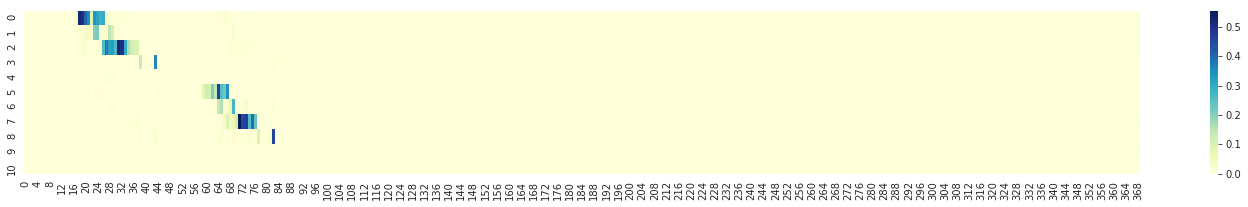

Epoch 1/20
31/31 [==============================] - 2s 53ms/step - loss: 2523.3306
Epoch 2/20
31/31 [==============================] - 2s 52ms/step - loss: 2520.9189
Epoch 3/20
31/31 [==============================] - 2s 53ms/step - loss: 2518.7146
Epoch 4/20
31/31 [==============================] - 2s 52ms/step - loss: 2516.4150
Epoch 5/20
31/31 [==============================] - 2s 52ms/step - loss: 2513.8613
Epoch 6/20
31/31 [==============================] - 2s 52ms/step - loss: 2511.7314
Epoch 7/20
31/31 [==============================] - 2s 53ms/step - loss: 2509.9797
Epoch 8/20
31/31 [==============================] - 2s 54ms/step - loss: 2507.7454
Epoch 9/20
31/31 [==============================] - 2s 54ms/step - loss: 2505.6782
Epoch 10/20
31/31 [==============================] - 2s 54ms/step - loss: 2504.0552
Epoch 11/20
31/31 [==============================] - 2s 54ms/step - loss: 2502.0630
Epoch 12/20
31/31 [==============================] - 2s 54ms/step - loss: 2500.2129
E

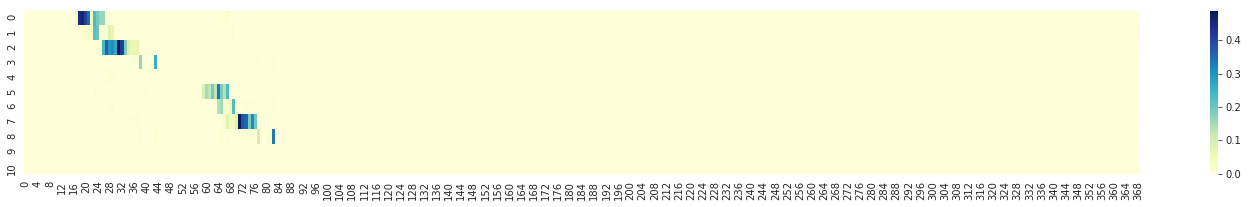

Epoch 1/20
31/31 [==============================] - 2s 53ms/step - loss: 2485.9341
Epoch 2/20
31/31 [==============================] - 2s 52ms/step - loss: 2484.6870
Epoch 3/20
31/31 [==============================] - 2s 52ms/step - loss: 2483.3091
Epoch 4/20
31/31 [==============================] - 2s 53ms/step - loss: 2482.0493
Epoch 5/20
31/31 [==============================] - 2s 52ms/step - loss: 2480.6729
Epoch 6/20
31/31 [==============================] - 2s 52ms/step - loss: 2479.3296
Epoch 7/20
31/31 [==============================] - 2s 53ms/step - loss: 2478.2341
Epoch 8/20
31/31 [==============================] - 2s 52ms/step - loss: 2476.8699
Epoch 9/20
31/31 [==============================] - 2s 52ms/step - loss: 2475.6431
Epoch 10/20
31/31 [==============================] - 2s 53ms/step - loss: 2474.6392
Epoch 11/20
31/31 [==============================] - 2s 53ms/step - loss: 2473.2551
Epoch 12/20
31/31 [==============================] - 2s 53ms/step - loss: 2472.2803
E

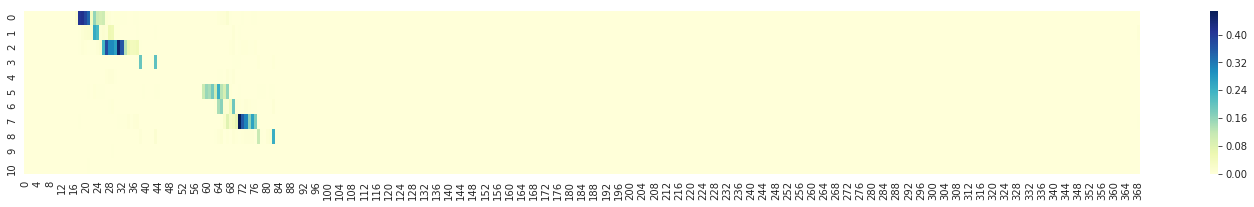

Epoch 1/20
31/31 [==============================] - 2s 53ms/step - loss: 2463.3569
Epoch 2/20
31/31 [==============================] - 2s 54ms/step - loss: 2462.4351
Epoch 3/20
31/31 [==============================] - 2s 53ms/step - loss: 2461.4473
Epoch 4/20
31/31 [==============================] - 2s 52ms/step - loss: 2460.5693
Epoch 5/20
31/31 [==============================] - 2s 52ms/step - loss: 2459.8948
Epoch 6/20
31/31 [==============================] - 2s 52ms/step - loss: 2458.8181
Epoch 7/20
31/31 [==============================] - 2s 53ms/step - loss: 2458.1636
Epoch 8/20
31/31 [==============================] - 2s 53ms/step - loss: 2457.5261
Epoch 9/20
31/31 [==============================] - 2s 53ms/step - loss: 2456.5359
Epoch 10/20
31/31 [==============================] - 2s 53ms/step - loss: 2455.8521
Epoch 11/20
31/31 [==============================] - 2s 52ms/step - loss: 2455.1064
Epoch 12/20
31/31 [==============================] - 2s 53ms/step - loss: 2454.3489
E

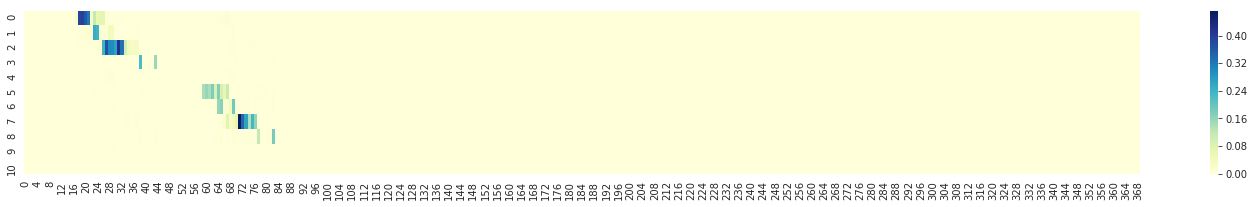

Epoch 1/20
31/31 [==============================] - 2s 53ms/step - loss: 2448.5449
Epoch 2/20
31/31 [==============================] - 2s 53ms/step - loss: 2447.8623
Epoch 3/20
31/31 [==============================] - 2s 52ms/step - loss: 2447.2268
Epoch 4/20
31/31 [==============================] - 2s 52ms/step - loss: 2446.6035
Epoch 5/20
31/31 [==============================] - 2s 53ms/step - loss: 2446.0435
Epoch 6/20
31/31 [==============================] - 2s 53ms/step - loss: 2445.4873
Epoch 7/20
31/31 [==============================] - 2s 53ms/step - loss: 2445.0918
Epoch 8/20
31/31 [==============================] - 2s 53ms/step - loss: 2444.3896
Epoch 9/20
31/31 [==============================] - 2s 53ms/step - loss: 2443.9507
Epoch 10/20
31/31 [==============================] - 2s 53ms/step - loss: 2443.3281
Epoch 11/20
31/31 [==============================] - 2s 53ms/step - loss: 2442.8311
Epoch 12/20
31/31 [==============================] - 2s 53ms/step - loss: 2442.2314
E

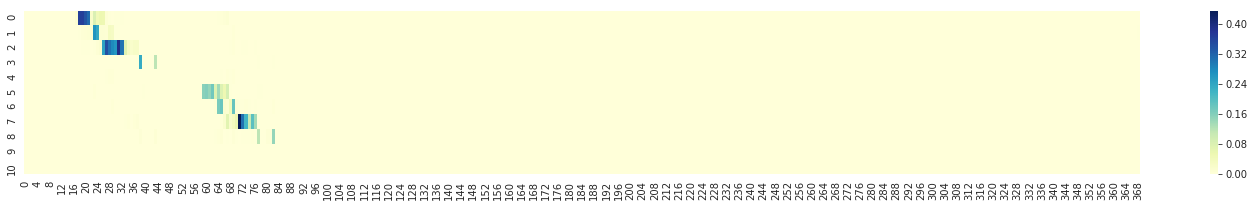

In [32]:


 
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(10):
      model.fit([_TEXTS[1:], _LENS[1:] ], np_LABELS[1:] , epochs=20)
      pred = model.predict([_TEXTS[0:2], _LENS[0:2] ])

      plot_matrix(pred[0])
      color_matrix(pred[0], _TEXTS[0])

    



In [0]:
# plot_matrix(pred[1])
# color_matrix(pred[1], _TEXTS[1])